In [1]:
# %% Import Libraries
#This is a test
import os
import pickle
import scipy.io
import numpy as np
import pandas as pd
import torch as tc
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

import matplotlib.patches as mpatches
from tqdm import tqdm
from bptt.models import Model
import model_anafunctions as func

plt.rcParams['font.size'] = 20

c:\Users\cestarellas\anaconda3\envs\PLAna\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#%% FUNCTIONS
def Hyper_mod(mpath,data_path):
    file=open(os.path.join(mpath,'hypers.pkl').replace("\\","/"),'rb')
    hyper=pickle.load(file)
    file.close()
    hyper['data_path']=os.path.join(data_path,'Training_data.npy').replace('\\','/')
    hyper['inputs_path']=os.path.join(data_path,'Training_inputs.npy').replace('\\','/')
    print(hyper['device_id'])
    hyper['device_id'] = 0
    print(hyper['device_id'])    
    full_name = open(os.path.join(mpath,'hypers.pkl').replace("\\","/"),"wb")                      # Name for training data
    pickle.dump(hyper,full_name)            # Save train data
    #close save instance 
    full_name.close()

In [3]:
#%% Load Data and Behaviour
################################ Directories and files to modify ################################ 
# Select Path for multi-unit data
data_path = 'D:\\_work_cestarellas\\Analysis\\PLRNN\\noautoencoder\\neuralactivity\\OFC\\CE17_reduction\\datasets\\' 
#data_path = 'D:/_work_cestarellas/Analysis/PLRNN/noautoencoder/neuralactivity/OFC/CE17/L6/Test0/datasets/' 
# Select Path for Models (Folder containing the specific models to test)
model_path = 'D:\\_work_cestarellas\\Analysis\\PLRNN\\noautoencoder\\results\\OFC_red'
#model_path = 'D:/_work_cestarellas/Analysis/PLRNN/noautoencoder/results/Tuning_OFC_CE17_221008'
#meta information
Meta_file_path = "D:\\_work_cestarellas\\Analysis\\PLRNN\\noautoencoder\\neuralactivity\\OFC\\CE17_reduction\\datasets\\Metadata.pkl"
#Behaviour path
behaviour_path='D:/_work_cestarellas/Analysis/PLRNN/Session_Selected/OFC/CE17_L6'

# Loading models and simulations
model_name = 'CE14_L6_01_HU_40_l1_0.001_l2_08_l3_00_SL_400_encdim_14/001'
#model_name = 'CE1701_HU_256_l1_0.001_l2_08_l3_00_SL_400_encdim_65/001'

## Loading recorded neuronal activity (pre-processesed)
mpath=os.path.join(model_path,model_name).replace('\\','/')

train_n,train_i = func.load_data(data_path,'Training')
test_n,test_i = func.load_data(data_path,'Test')

Hyper_mod(mpath,data_path)

# Loading Model
num_epochs = 150000
m = Model()
m.init_from_model_path(mpath, epoch=num_epochs)
m.eval()

# Generation Training Data
ModelS=[]
for w_index in tqdm(range(len(train_n))):
    data_trial=tc.from_numpy(train_n[w_index]).float()          # tensor of neuronal data for initial trial data
    input_trial = tc.from_numpy(train_i[w_index]).float()
    length_sim = input_trial.shape[0]
    X, _ = m.generate_free_trajectory(data_trial,input_trial,length_sim,w_index)
    ModelS.append(X[:,:])

# Concatenating signals
Nseries,_=func.concatenate_list(train_n,0)          # recorded activity
Iseries,_=func.concatenate_list(train_i,0)          # external input
Mseries,_=func.concatenate_list(ModelS,0)           # simulated activity


0
0
Chosen model is clipped shPLRNN, the bases Parameter has no effect here!


100%|██████████| 53/53 [00:04<00:00, 12.09it/s]


In [4]:
Input_Limit = tc.zeros(1000000,3)

In [5]:
Input_Limit.shape

torch.Size([1000000, 3])

In [22]:
# Generation Training Data
Model_Limit=[]
Trials_test = [10,15,20,26,18,31,35,42,50]


length_sim = 1000000
Input_Limit = tc.zeros((length_sim,3))
for w_index in Trials_test:
    data_trial = tc.from_numpy(train_n[w_index]).float() 
    X_Lim, _ = m.generate_free_trajectory(data_trial,Input_Limit,length_sim,w_index)
    Model_Limit.append(X_Lim)

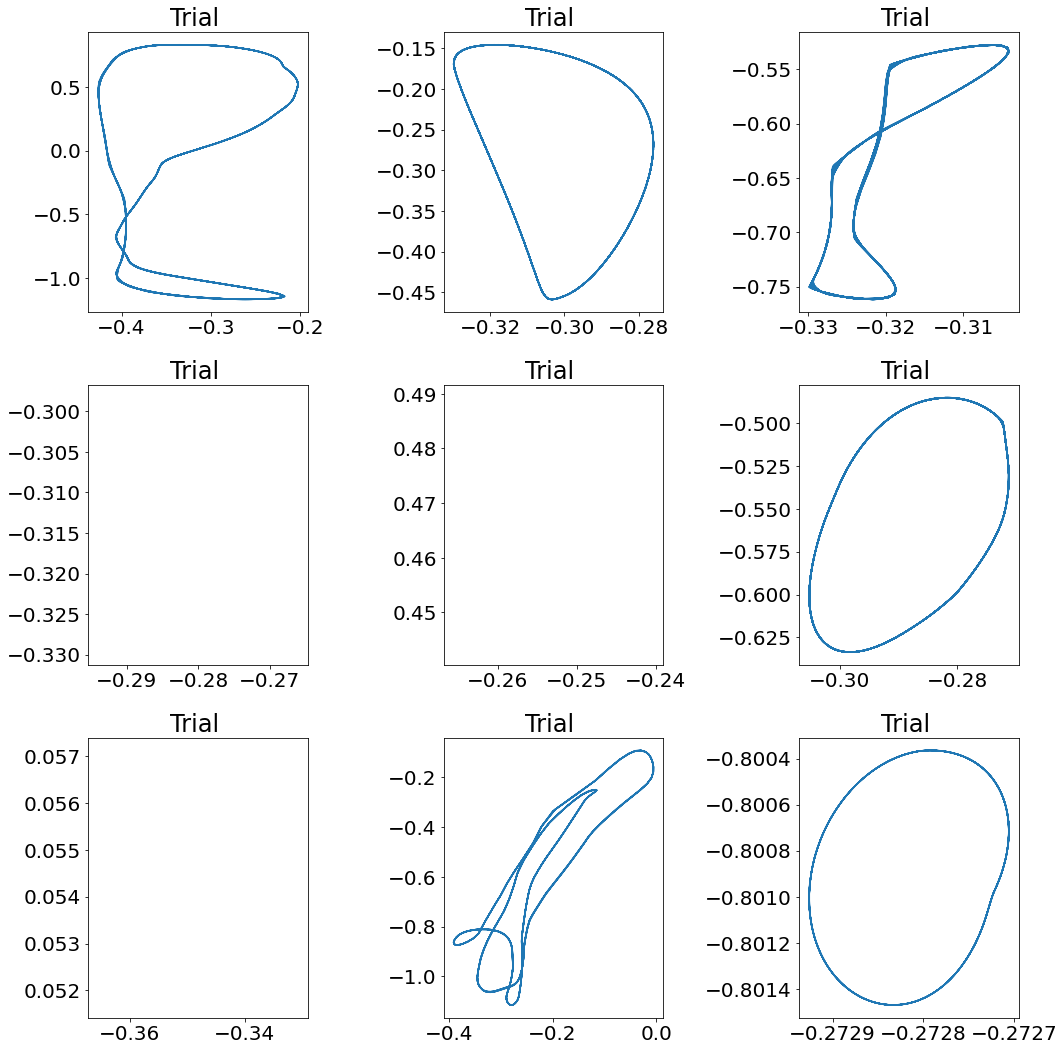

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot data on each subplot
eneu1 = 5
eneu2 = 11
for i in range(3):
    for j in range(3):
        index = i * 3 + j
        axes[i, j].plot(Model_Limit[index][-1000:,eneu1], Model_Limit[index][-1000:,eneu2])
        axes[i, j].set_title('Trial ')

# Adjust layout
plt.tight_layout()
plt.show()

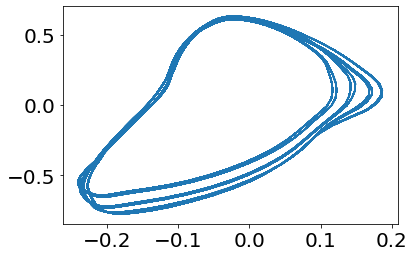

In [17]:
# Generation Training Data
Model_Limit=[]
w_index = 30
length_sim = 1000000
Input_Limit = tc.zeros((length_sim,3))
data_trial = tc.from_numpy(train_n[w_index]).float() 
X_Lim, _ = m.generate_free_trajectory(data_trial,Input_Limit,length_sim,w_index)
plt.figure()
plt.plot(X_Lim[-10000:,2],X_Lim[-10000:,10])

In [33]:
Model_Limit[3].shape


torch.Size([1000000, 14])

In [21]:

def virtual_trials():
    # Creation of virtual trials
    num_virtual_trial=100
    virt_trial= np.zeros((1,3))
    virt_dec = np.zeros((num_virtual_trial,1))
    virt_rew = np.zeros((num_virtual_trial,1))
    for vt in range(num_virtual_trial):
        wheel = zeros(50,3)             # wheel stop 1s
        lcue=cue_dist[rand(1:length(cue_dist))]  
        cue = zeros(lcue,3)
        cue[:,1].=1
        # Gamble choice
        if rand()<=Dec_prob[TS]
            virt_dec[vt]=1
            # Probability of gamble reward
            if rand()<gamb_prob[TS]
                # Yes Reward
                virt_rew[vt]=1
                reward=zeros(25,3)
                reward[:,2].=4
            else
                # No Reward
                reward=zeros(25,3)
            end
        # Safe choice
        else
            if rand()<safe_prob
                # Yes Reward
                virt_rew[vt]=1
                reward=zeros(25,3)
                reward[:,2].=1
            else
                # No Reward
                reward=zeros(25,3)
            end
        end
    iti_time = zeros(iti_dist[rand(1:length(iti_dist))],3)
    ind_trial=vcat(wheel,cue,reward,iti_time)
    virt_trial=vcat(virt_trial,ind_trial)
    
    
    # Initialization of the external inputs for the simulation
    Time_Steps=100000
    warm_up=zeros(Time_Steps,3)
    # Creation Stimulus
    Stimulus = vcat(warm_up,virt_trial)
    # Select initial condition
    num_Z=14
    clipped=true
    Simulation_step=size(Stimulus)[1]
    Gene_Virt=get_latent_input_series(Simulation_step,A,W₁,W₂,h₁,h₂,Stimulus,num_Z,z_0=IC,is_clipped=clipped)
    Gene_trial=hcat(Gene_Virt...)'
    return Gene_trial
end


AttributeError: module 'matplotlib.pyplot' has no attribute 'scatter3D'

<Figure size 432x288 with 0 Axes>

In [49]:

Serie1 = [298.1515981073722,
328.19199914229216,
301.899778849397,
341.66895631318243,
311.00989335863477,
353.806710325562,
270.1937477242647,
382.03666867151196,
349.5680193958034,
350.2562072155801,
392.17193148327385,
366.30948059109795,
338.6665923873054,
302.45286865785806,
303.7869011732796,
313.56692750109073,
326.5741406396985,
298.5405182198246,
368.21460316071597,
289.21649576962005,
318.90939950421017,
323.5074146451814,
264.0265484505571,
307.0454953013474,
338.7894064113757,
255.7179698984076,
244.9402329949807,
320.4746499271124,
287.96076113314643,
230.29816041051447,
273.3926996338163,
250.77153211572283,
228.42891853372893,
227.17483218566474,
223.37498442709966,
150.7320043125046,
264.8788769828472,
271.0786386338515,
213.9120647286674,
277.60502003656836,
243.8543559317541,
207.79185241317097,
240.90553890898386,
229.70354958333138,
263.12755211664404,
194.28207230638884,
186.43791751638292,
263.9737085607949,
219.472078225884,
252.47768006928288]

Serie2 = [293.71720351414075,
296.6742912654552,
304.81317401507505,
344.72549510714464,
361.91314559575994,
335.51810185286223,
267.9283940026133,
335.8727346785679,
316.5785748869488,
359.15827598376114,
356.5243466771584,
362.34209563187864,
319.1794936661814,
333.7672906454017,
325.0655255686744,
314.6591741722864,
332.8726263000723,
317.7320273208103,
346.84850092517945,
310.7825836486024,
327.54108776804907,
320.4343323539478,
246.9699115848013,
292.3714436195973,
274.9373786852283,
255.55391623877352,
260.63481939762397,
269.5330392276015,
265.0882349324163,
274.35503385055665,
309.0463728658577,
246.20406190472605,
216.6524518550628,
216.64915215171933,
211.20693252711084,
152.0557641927337,
245.01138826937475,
245.34148557594006,
192.15865172982478,
250.13385662656324,
251.4659027678459,
217.48613639477563,
245.29679170377963,
224.87295364172343,
258.3323385025692,
208.02870364759534,
200.34193658179467,
265.13159812687513,
228.22601966103576,
240.91501812448283]

Serie3 = [270.3614850965565,
287.75805908627785,
301.2625359435782,
294.2504064614081,
348.3832912287192,
334.65738931060883,
291.07060486842164,
318.8152228867457,
308.4835370440347,
359.4140890562278,
347.95452201077353,
334.58944157558153,
360.70521581654236,
311.34579115667873,
334.9827200772204,
289.5003759695798,
325.09677610765834,
319.919013687572,
339.69612222451036,
315.2968434902056,
356.27056455674517,
326.09091459241597,
270.9991042813283,
300.07406821387065,
303.02907515936243,
272.7972597786727,
254.15323224323294,
221.21141814660845,
268.9712835073261,
265.3911591328166,
308.6559693537128,
250.50120678509023,
236.8804104103236,
217.49290718350724,
203.53036269425144,
150.86474078968462,
248.2435757663986,
207.91875383197777,
199.80851131056298,
196.6570847738738,
252.62613052563248,
232.1029040014692,
243.9080906177134,
222.65760232964897,
247.28139691957784,
209.9144400681816,
193.57816935134525,
237.99663049957624,
218.4183315363821,
253.66291113973608]

Serie4 = [321.5516345652763,
293.5016520827335,
397.7844658769702,
309.62692563941937,
375.4198977315426,
385.92169450889,
263.2254952183064,
338.0389099223943,
364.7085048067202,
327.0010855711394,
359.0926272648804,
423.1252479219868,
377.29347740484553,
321.5193034971671,
300.22648120852114,
310.76908177189335,
326.1076647984777,
327.841206653235,
350.3999520703158,
336.94969642909876,
359.7253733705394,
320.79995086015487,
261.4350361989254,
324.3097431545908,
282.35105918620604,
255.20259722324383,
273.53420794500306,
246.73840267526083,
264.2751769190336,
251.32240724775903,
307.99604501793647,
251.09684814405267,
226.59855503173634,
213.83452076989326,
256.1369167194962,
157.09542162367427,
250.83178863517344,
211.63186715800245,
197.6235460068013,
196.34790335930347,
269.12998620715535,
227.9931896123343,
235.04706823096797,
235.5654599786922,
256.7190630973298,
235.6745055785104,
186.57178760197792,
216.50516750631425,
234.03434536219314,
251.8929761757586]

Serie5 = [334.403913283057,
301.22517214205845,
353.61727146879,
328.9705000641081,
342.32163539428404,
325.5397236216603,
273.81055394106835,
331.3423035345606,
349.71903181600567,
340.27502223882715,
324.69673284805185,
388.75099083615487,
317.3966511852028,
342.54294880273443,
304.68206609384555,
327.1662255238031,
308.99650525652896,
304.4243651917301,
338.9454576889382,
317.930275460599,
301.71450318180274,
329.05686327609527,
266.9219697142921,
322.95870094045716,
298.8879331137626,
290.75194182741734,
252.16884710310467,
257.42809900915825,
262.3998058608704,
240.84981867726233,
251.09281034707428,
248.52808997091944,
233.20299150850286,
221.09109058640976,
235.65007740407276,
147.69872473335965,
262.49309483689154,
233.87934963496528,
214.74098508125672,
272.23940178345964,
255.81457822606512,
217.3931564637791,
246.98432611047267,
199.8104372624879,
232.53007393694975,
230.42895641140026,
197.75925836936264,
267.5346678635252,
244.28246169581402,
232.48460498074098]

In [50]:
Matrix = np.zeros((len(Serie1),5))
Matrix[:,0] = np.array(Serie1)
Matrix[:,1] = np.array(Serie2)
Matrix[:,2] = np.array(Serie3)
Matrix[:,3] = np.array(Serie4)
Matrix[:,4] = np.array(Serie5)

In [51]:
Matrix.mean(1).shape

(50,)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


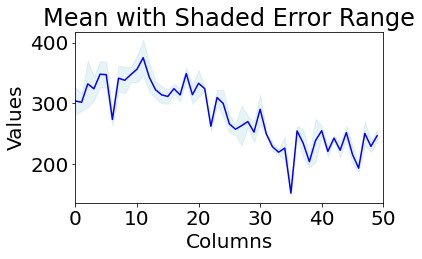

In [68]:

# Calculate mean and standard deviation (or other error measure)
mean_values = np.mean(Matrix, axis=1)
std_values = np.std(Matrix, axis=1)

plt.figure()
plt.plot(range(0, 50), mean_values, color='b', label='Mean')
# Shade error region between mean - std and mean + std
plt.fill_between(range(0, 50), mean_values - std_values, mean_values + std_values, color='lightblue', alpha=0.3, label='Error Range')
plt.xlim([0,50])
# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Mean with Shaded Error Range')
plt.tight_layout()
plt.savefig("C:\\Users\\cestarellas\\Documents\\FENS2024\\images\\6_Panel\\transition.eps")
plt.show()


In [63]:
State1 = Matrix[0:20,:].mean(0)
State2 = Matrix[35:50,:].mean(0)
print(State1)
print(State2)

[329.31420193 326.83365277 319.67717215 340.50525025 327.83786732]
[232.01552736 228.31990304 221.04261823 224.17760508 230.40493849]


In [65]:
from scipy import stats

# Perform t-test
t_statistic, p_value = stats.ttest_ind(State1, State2, equal_var=False)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: 25.94057080652981
p-value: 7.311769144516319e-08


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


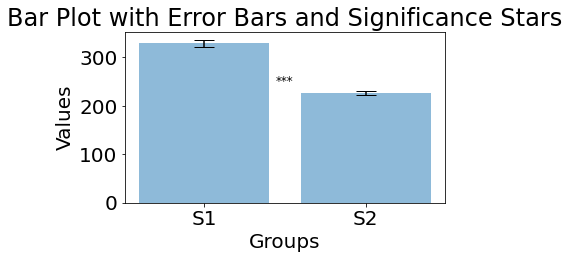

In [69]:
S1 = np.array([329.31420193, 326.83365277, 319.67717215, 340.50525025, 327.83786732])
S2 = np.array([232.01552736, 228.31990304, 221.04261823, 224.17760508, 230.40493849])
t_statistic, p_value = stats.ttest_ind(S1, S2, equal_var=False)
mean_S1 = np.mean(S1)
std_S1 = np.std(S1)

mean_S2 = np.mean(S2)
std_S2 = np.std(S2)
# Define labels and positions for bars
labels = ['S1', 'S2']
x = np.arange(len(labels))

# Define bar heights and errors
heights = [mean_S1, mean_S2]
errors = [std_S1, std_S2]

# Plot bars with error bars
plt.bar(x, heights, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)

# Add significance stars
if p_value < 0.001:
    significance = '***'
elif p_value < 0.01:
    significance = '**'
elif p_value < 0.05:
    significance = '*'
else:
    significance = ''

# Add text annotation for significance
plt.text(0.5, mean_S2 + 10, significance, ha='center', va='bottom', fontsize=12)

# Add labels and title
plt.xticks(x, labels)
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Bar Plot with Error Bars and Significance Stars')

# Show plot
plt.tight_layout()
plt.savefig("C:\\Users\\cestarellas\\Documents\\FENS2024\\images\\6_Panel\\Comparison.eps")
plt.show()

